## Contributors
### Jay Upadhyay
### 
###
###
###

# Libraries

In [20]:
from tensorflow import keras
from keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import numpy as np
import h5py


In [2]:
from astroNN.datasets import load_galaxy10

with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


# 1. Project Proposal


# 2. Data Collection and data cleaning


In [3]:
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)


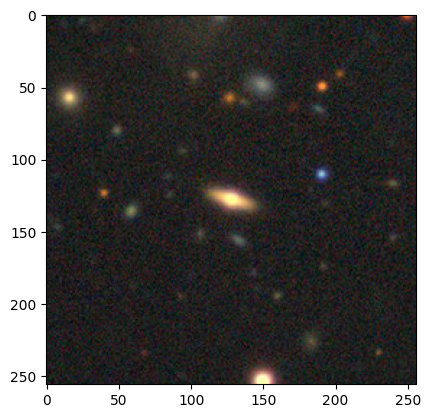

In [4]:
rand_list=[]

for i in range(5):
    rand_list.append(random.randint(0,images.shape[0]))
rand_list
plt.imshow(images[rand_list[0]])
# for x in rand_list:
#     plt.imshow(images[x])

# 3. EDA

In [5]:
images.shape
# The 21785 says there are that many images
# 69 says the pixels in the images(69x69)
# The 3 shows the bands(g,r,z) 

(17736, 256, 256, 3)

In [6]:
# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

In [7]:
images.size*.8
X_train,X_test=train_test_split(images, test_size=0.2)
Y_train,Y_test=train_test_split(labels, test_size=0.2)

In [24]:
# model=Sequential()
# model.add(Conv2D(32,kernel_size=3,activation="tanh",input_shape=X_train[0].shape))
# model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
# model.add(Dense(10))

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [26]:
history = model.fit(X_train, Y_train, 
                    epochs=10
                )

Epoch 1/10
444/444 [==============================] - 241s 541ms/step - loss: 8.3445 - accuracy: 0.1484
Epoch 2/10
444/444 [==============================] - 254s 572ms/step - loss: 8.3362 - accuracy: 0.1486
Epoch 3/10
444/444 [==============================] - 266s 599ms/step - loss: 8.3362 - accuracy: 0.1486
Epoch 4/10
444/444 [==============================] - 550s 1s/step - loss: 8.3362 - accuracy: 0.1486
Epoch 5/10
444/444 [==============================] - 15924s 36s/step - loss: 8.3362 - accuracy: 0.1486
Epoch 6/10
444/444 [==============================] - 24415s 55s/step - loss: 8.3362 - accuracy: 0.1486
Epoch 7/10
444/444 [==============================] - 231s 521ms/step - loss: 8.3362 - accuracy: 0.1486
Epoch 8/10
444/444 [==============================] - 234s 527ms/step - loss: 8.3362 - accuracy: 0.1486
Epoch 9/10
444/444 [==============================] - 239s 539ms/step - loss: 8.3362 - accuracy: 0.1486
Epoch 10/10
444/444 [==============================] - 255s 574ms/s

In [27]:
model.evaluate(X_test,Y_test)

111/111 [==============================] - 18s 160ms/step - loss: 8.4225 - accuracy: 0.1466


[8.422477722167969, 0.14656144380569458]

# 4. Techniques Used

# 5. Project Proposal